<a href="https://colab.research.google.com/github/Bhawesh-ss/Covid_19/blob/main/Bhawesh_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data_set = pd.read_csv('/content/Covid 19 dataset.csv')

In [7]:
print(data_set.head())

       country        date  total_cases  new_cases  new_cases_smoothed  \
0  Afghanistan  01-01-2020          NaN        NaN                 NaN   
1  Afghanistan  02-01-2020          NaN        NaN                 NaN   
2  Afghanistan  03-01-2020          NaN        NaN                 NaN   
3  Afghanistan  04-01-2020          0.0        0.0                 NaN   
4  Afghanistan  05-01-2020          0.0        0.0                 NaN   

   total_cases_per_million  new_cases_per_million  \
0                      NaN                    NaN   
1                      NaN                    NaN   
2                      NaN                    NaN   
3                      0.0                    0.0   
4                      0.0                    0.0   

   new_cases_smoothed_per_million  total_deaths  new_deaths  ...  population  \
0                             NaN           NaN         NaN  ...  40578801.0   
1                             NaN           NaN         NaN  ...  40578801.0

## Handle missing values

### Subtask:
Address missing values in relevant columns like `new_cases`, `total_deaths`, etc.

In [8]:
data_set.info()
print(data_set.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119878 entries, 0 to 119877
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     119878 non-null  object 
 1   date                                        119878 non-null  object 
 2   total_cases                                 118057 non-null  float64
 3   new_cases                                   118044 non-null  float64
 4   new_cases_smoothed                          117752 non-null  float64
 5   total_cases_per_million                     118057 non-null  float64
 6   new_cases_per_million                       118044 non-null  float64
 7   new_cases_smoothed_per_million              117752 non-null  float64
 8   total_deaths                                118057 non-null  float64
 9   new_deaths                                  118047 non-null  float64
 

In [9]:
# only numeric columns to fill missing values
numeric_cols = data_set.select_dtypes(include=['float64', 'int64']).columns

data_set[numeric_cols] = data_set[numeric_cols].ffill().bfill()

# Verify missing value
print(data_set[numeric_cols].isnull().sum())


total_cases                                        0
new_cases                                          0
new_cases_smoothed                                 0
total_cases_per_million                            0
new_cases_per_million                              0
new_cases_smoothed_per_million                     0
total_deaths                                       0
new_deaths                                         0
new_deaths_smoothed                                0
total_deaths_per_million                           0
new_deaths_per_million                             0
new_deaths_smoothed_per_million                    0
excess_mortality                                   0
excess_mortality_cumulative                        0
excess_mortality_cumulative_absolute               0
excess_mortality_cumulative_per_million            0
hosp_patients                                      0
hosp_patients_per_million                          0
weekly_hosp_admissions                        

In [10]:
# Drop the columns that all null values
data_set.drop(columns=['human_development_index', 'life_expectancy'], inplace=True)

print(data_set.columns)

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

## Convert date column

### Subtask:
Convert the `date` column to a proper datetime format to enable time-based analysis.


In [11]:
data_set['date'] = pd.to_datetime(data_set['date'], format='%d-%m-%Y')
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119878 entries, 0 to 119877
Data columns (total 59 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   country                                     119878 non-null  object        
 1   date                                        119878 non-null  datetime64[ns]
 2   total_cases                                 119878 non-null  float64       
 3   new_cases                                   119878 non-null  float64       
 4   new_cases_smoothed                          119878 non-null  float64       
 5   total_cases_per_million                     119878 non-null  float64       
 6   new_cases_per_million                       119878 non-null  float64       
 7   new_cases_smoothed_per_million              119878 non-null  float64       
 8   total_deaths                                119878 non-null  float64      

## Normalize country names

### Subtask:
Check for inconsistencies in country names and normalize them if necessary.


In [12]:
# Remove non-country entries by dropping rows where 'continent' is missing
filtered_df = data_set.dropna(subset=['continent'])

# Display unique country names
print(filtered_df['country'].unique())


['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic']


## Ensure correct data types

### Subtask:
Verify and convert columns to appropriate numeric types (float, int) where needed.


In [13]:
unique_continents = data_set['continent'].dropna().unique()
print(unique_continents)


['Asia' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']


## Handle duplicates and inconsistent time entries

### Subtask:
Identify and resolve duplicate rows or inconsistent time series entries for countries.


In [14]:
# Remove duplicate rows if any exist
if data_set.duplicated().sum():
    data_set.drop_duplicates(keep='first', inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [15]:
# Check if the data is sorted by date for each country
if not data_set.groupby('country')['date'].is_monotonic_increasing.all():
    data_set.sort_values(by=['country', 'date'], inplace=True)
    print("DataFrame sorted by country and date.")
else:
    print("Data is already sorted by date for each country.")

Data is already sorted by date for each country.


## Visualize Time to Peak

### Subtask:
Visualize the time to peak for the countries with the smallest and largest number of days using bar plots.

In [16]:
first_case = data_set[data_set['total_cases'] > 0].groupby('country')['date'].min().reset_index()
peak_case = data_set.loc[data_set.groupby('country')['total_cases'].idxmax(), ['country', 'date']].rename(columns={'date': 'peak_date'})

time_to_peak = first_case.merge(peak_case, on='country')
time_to_peak['days_to_peak'] = (time_to_peak['peak_date'] - time_to_peak['date']).dt.days

print(time_to_peak[['country', 'days_to_peak']])


                         country  days_to_peak
0                    Afghanistan          1524
1                         Africa          1906
2                        Albania             0
3                        Algeria             0
4                 American Samoa           723
..                           ...           ...
57  Democratic Republic of Congo             0
58                       Denmark          1951
59                      Djibouti             0
60                      Dominica          1413
61            Dominican Republic           759

[62 rows x 2 columns]


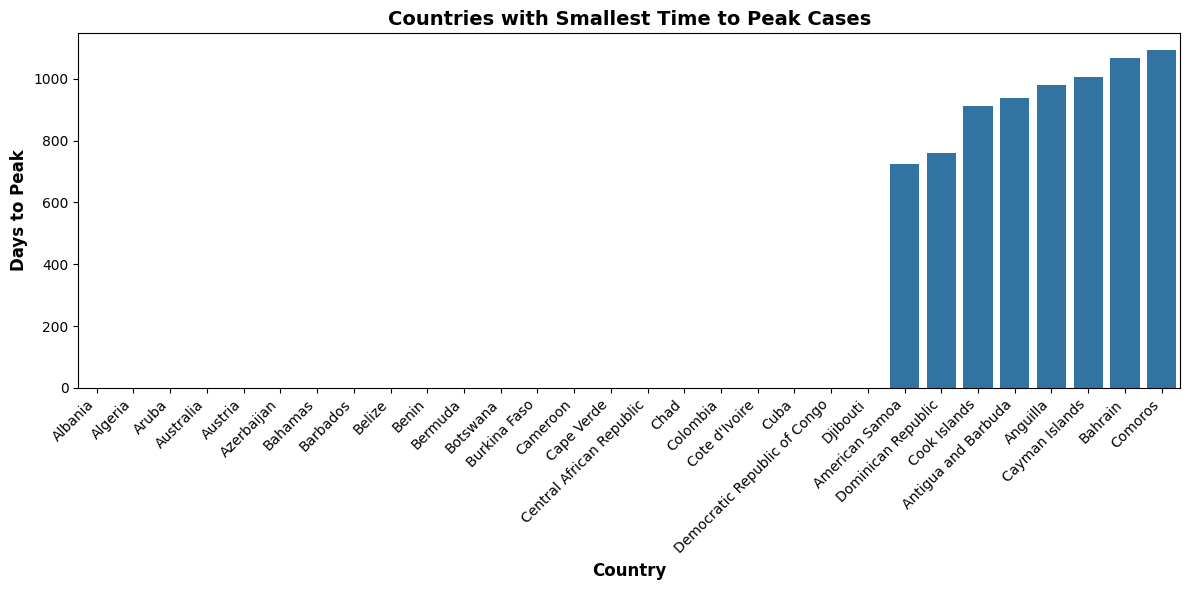

In [17]:
nsmallest_countries = time_to_peak.nsmallest(30, 'days_to_peak')

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='days_to_peak', data=nsmallest_countries)
plt.title('Countries with Smallest Time to Peak Cases',fontsize=14,fontweight='bold')
plt.xlabel('Country',fontsize=12,fontweight='bold')
plt.ylabel('Days to Peak',fontsize=12,fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

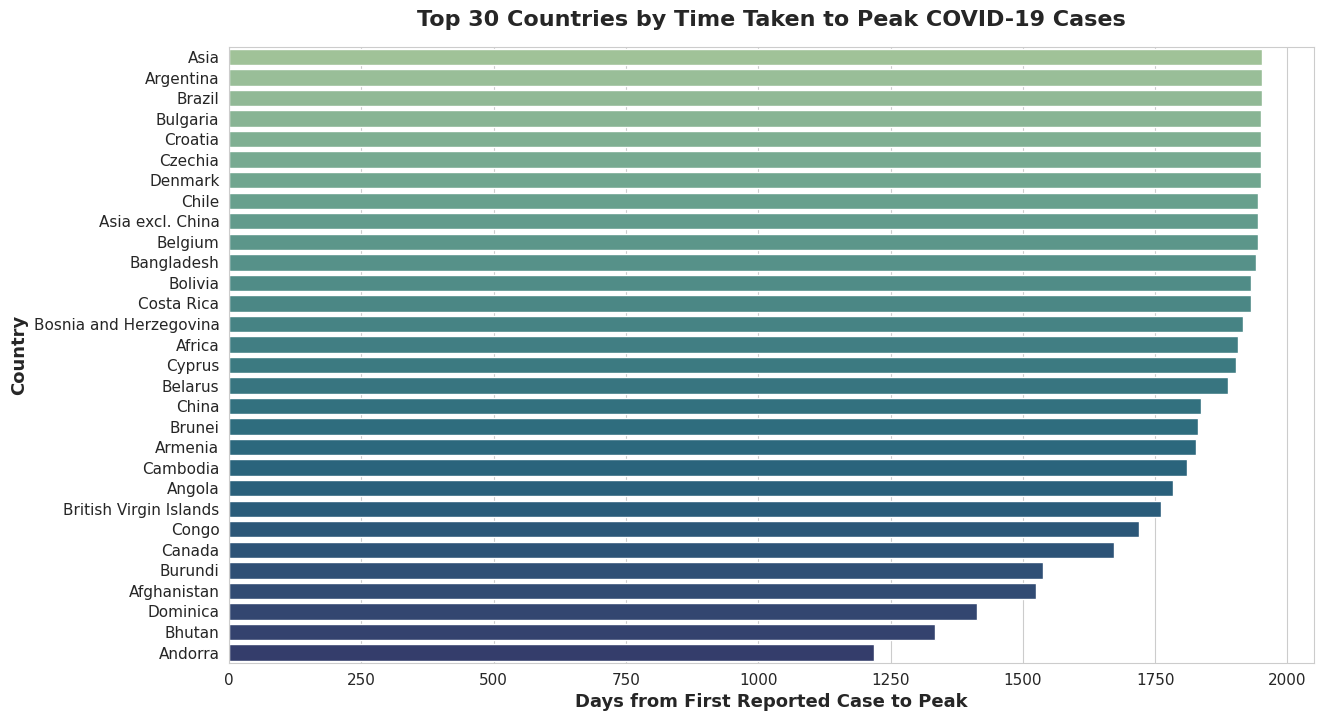

In [61]:
# Top 30 countries with largest time to reach peak
nlargest_countries = time_to_peak.nlargest(30, 'days_to_peak')

# Set up the figure
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Barplot
ax = sns.barplot(
    data=nlargest_countries.sort_values('days_to_peak', ascending=False),
    x='days_to_peak', y='country',
    palette='crest'
)

plt.title('Top 30 Countries by Time Taken to Peak COVID-19 Cases',fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Days from First Reported Case to Peak', fontsize=13, fontweight='bold')
plt.ylabel('Country', fontsize=13, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()


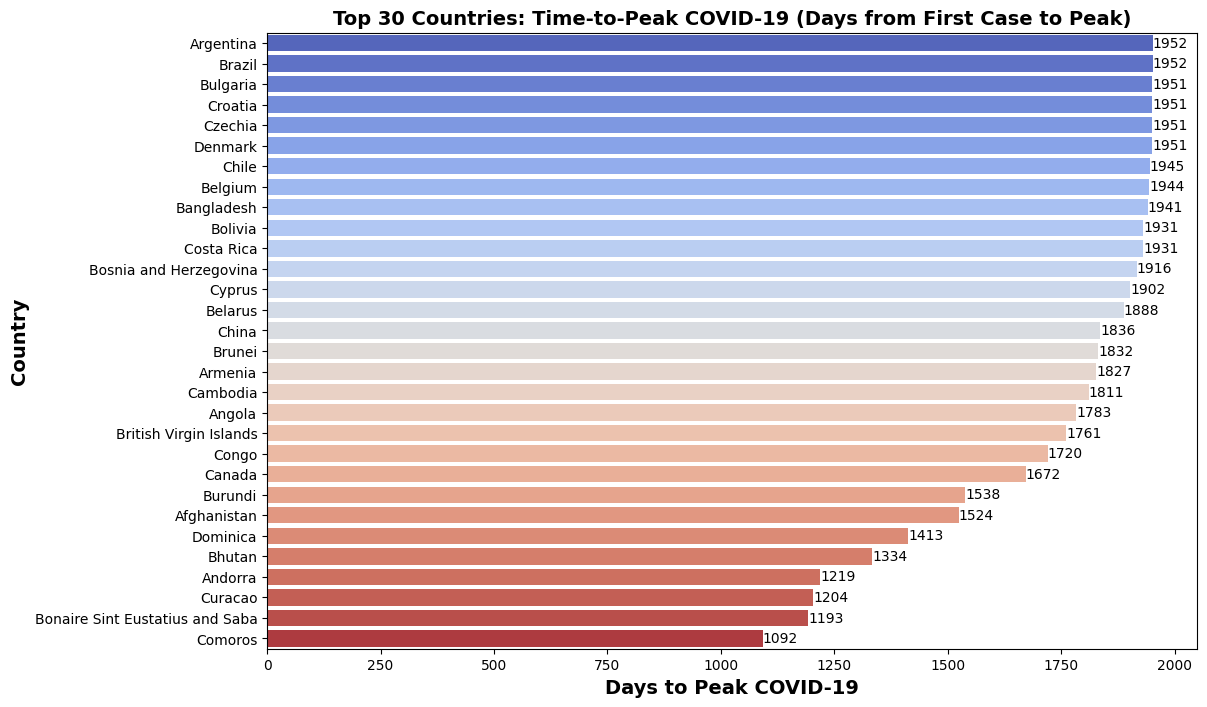

In [19]:
# Merge time_to_peak with filtered_df to include only actual countries
time_to_peak_filtered = time_to_peak.merge(filtered_df[['country']].drop_duplicates(), on='country', how='inner')

# Select the top 30 countries with the largest time to peak from the filtered data
top_30 = time_to_peak_filtered.nlargest(30, 'days_to_peak')

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='days_to_peak', y='country', data=top_30, hue='country', palette='coolwarm', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xlabel('Days to Peak COVID-19', fontsize=14, fontweight='bold')
plt.ylabel('Country', fontsize=14, fontweight='bold')
plt.title('Top 30 Countries: Time-to-Peak COVID-19 (Days from First Case to Peak)', fontsize=14, fontweight='bold')
plt.show()

### Subtask:
Calculate the average time to peak for each continent and visualize the results using a bar plot.

/tmp/ipython-input-20-2416663099.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time_to_peak.index, y=avg_time_to_peak.values, palette='coolwarm')


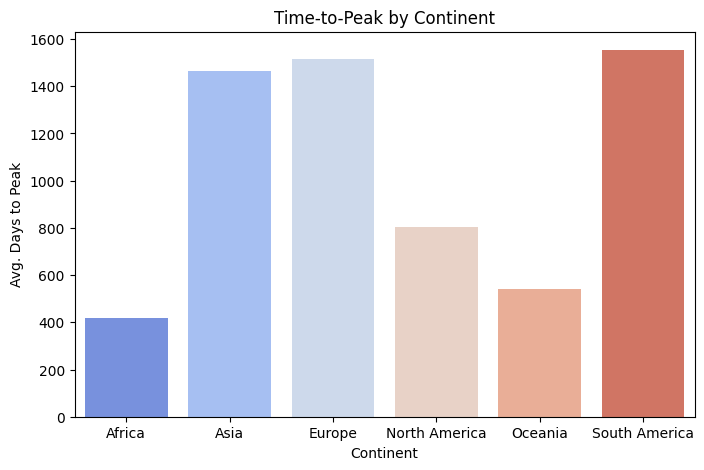

In [20]:
# Merge time_to_peak with filtered_df to add continent information
time_to_peak_continent = time_to_peak.merge(filtered_df[['country', 'continent']], on='country', how='left')

# Calculate average time to peak per continent
avg_time_to_peak = time_to_peak_continent.groupby('continent')['days_to_peak'].mean()

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_time_to_peak.index, y=avg_time_to_peak.values, palette='coolwarm')
plt.xlabel('Continent')
plt.ylabel('Avg. Days to Peak')
plt.title('Time-to-Peak by Continent')
plt.show()


# Task
Rank countries by total cases, deaths, deaths per million.

In [21]:
country_summary = filtered_df.groupby('country').agg(
    max_total_cases=('total_cases', 'max'),
    max_total_deaths=('total_deaths', 'max'),
    max_total_deaths_per_million=('total_deaths_per_million', 'max')
).reset_index()

### Visualize Top 10 Countries by Total Cases

In [22]:
country_summary_sorted_cases = country_summary.sort_values(by='max_total_cases', ascending=False)
print(country_summary_sorted_cases.head())

      country  max_total_cases  max_total_deaths  max_total_deaths_per_million
11  Australia      202241290.0         1515050.0                     963.17194
43   Colombia       99381761.0          142760.0                    2759.29300
42      China       99381761.0          122398.0                    3215.46830
28     Brazil       37725166.0          702820.0                    3341.88670
1     Albania       13062418.0          258288.0                    1276.01090


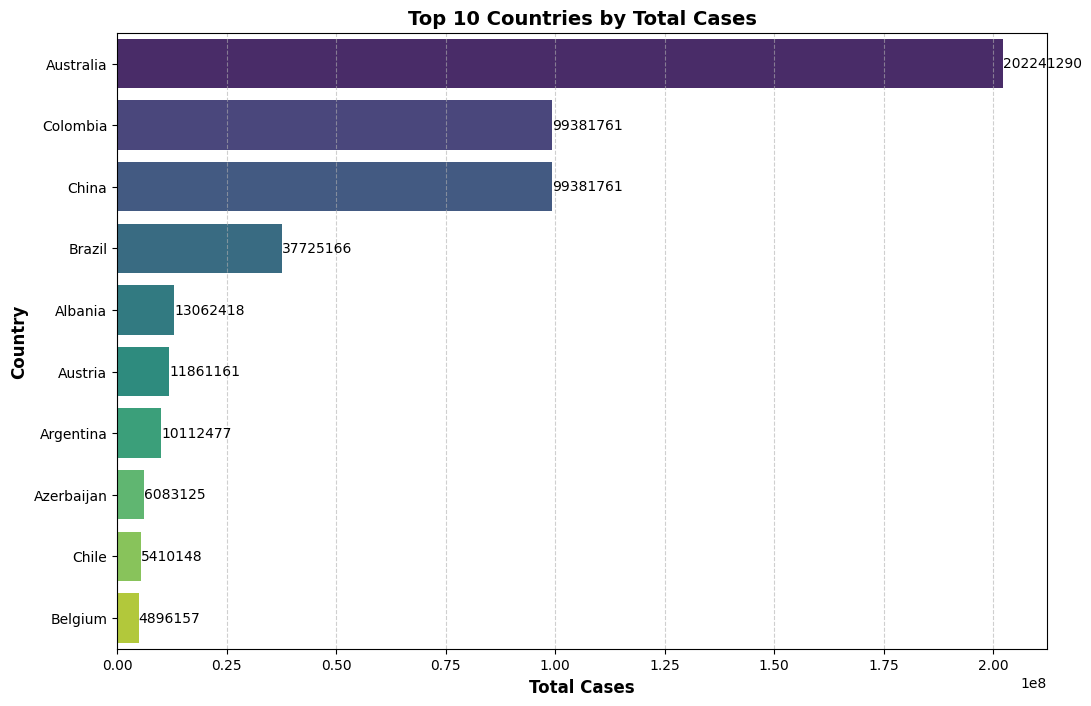

In [23]:
# Select the top 10 countries by total cases
top_10_cases = country_summary_sorted_cases.head(10)

plt.figure(figsize=(12, 8))
ax_cases = sns.barplot(x='max_total_cases', y='country', data=top_10_cases, hue='country', palette='viridis', legend=False)

for container in ax_cases.containers:
    ax_cases.bar_label(container, fmt='%.0f')

plt.xlabel('Total Cases',fontsize=12,fontweight='bold')
plt.ylabel('Country',fontsize=12,fontweight='bold')
plt.title('Top 10 Countries by Total Cases',fontsize=14,fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## Top 10 Countries with the Lowest Maximum Total Cases

### Subtask:
Identify and display the top 10 countries with the lowest maximum total cases recorded.

In [24]:
# Sort the country_summary by 'max_total_cases' in ascending order and select the top 10
country_summary_sorted_cases_lowest = country_summary.sort_values(by='max_total_cases', ascending=True)

print("Top 10 Countries with the Lowest Maximum Total Cases:")
display(country_summary_sorted_cases_lowest.head(10)

Top 10 Countries with the Lowest Maximum Total Cases:


,country,max_total_cases,max_total_deaths,max_total_deaths_per_million
6,Anguilla,3904.0,12.0,847.218300
46,Cook Islands,7375.0,2.0,135.998920
29,British Virgin Islands,7644.0,64.0,1671.105600
3,American Samoa,8359.0,34.0,703.613300
7,Antigua and Barbuda,9106.0,146.0,1573.208000
44,Comoros,9109.0,161.0,193.014310
25,Bonaire Sint Eustatius and Saba,11922.0,41.0,1433.366000
40,Chad,15472.0,194.0,22.165611
57,Dominica,16047.0,189.0,1107.767800
45,Congo,25234.0,389.0,191.815480


## Visualize Top 10 Countries by Lowest Maximum Total Cases


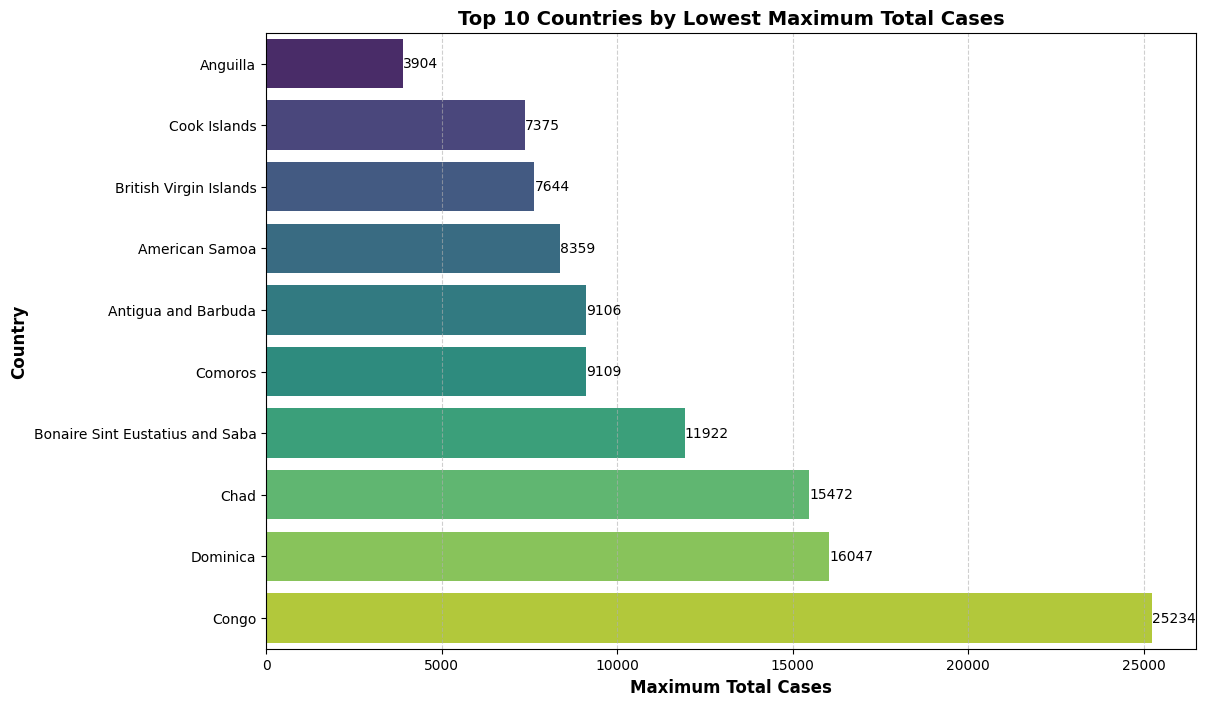

In [25]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='max_total_cases', y='country', data=country_summary_sorted_cases_lowest.head(10), hue='country', palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.xlabel('Maximum Total Cases', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries by Lowest Maximum Total Cases', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Visualize Top 10 Countries by Total Deaths

In [26]:
# Sort country_summary by 'max_total_deaths' in descending order
country_summary_sorted_deaths = country_summary.sort_values(by='max_total_deaths', ascending=False)
print(country_summary_sorted_deaths.head())

      country  max_total_cases  max_total_deaths  max_total_deaths_per_million
11  Australia      202241290.0         1515050.0                     963.17194
28     Brazil       37725166.0          702820.0                    3341.88670
1     Albania       13062418.0          258288.0                    1276.01090
43   Colombia       99381761.0          142760.0                    2759.29300
8   Argentina       10112477.0          130755.0                    2879.56710


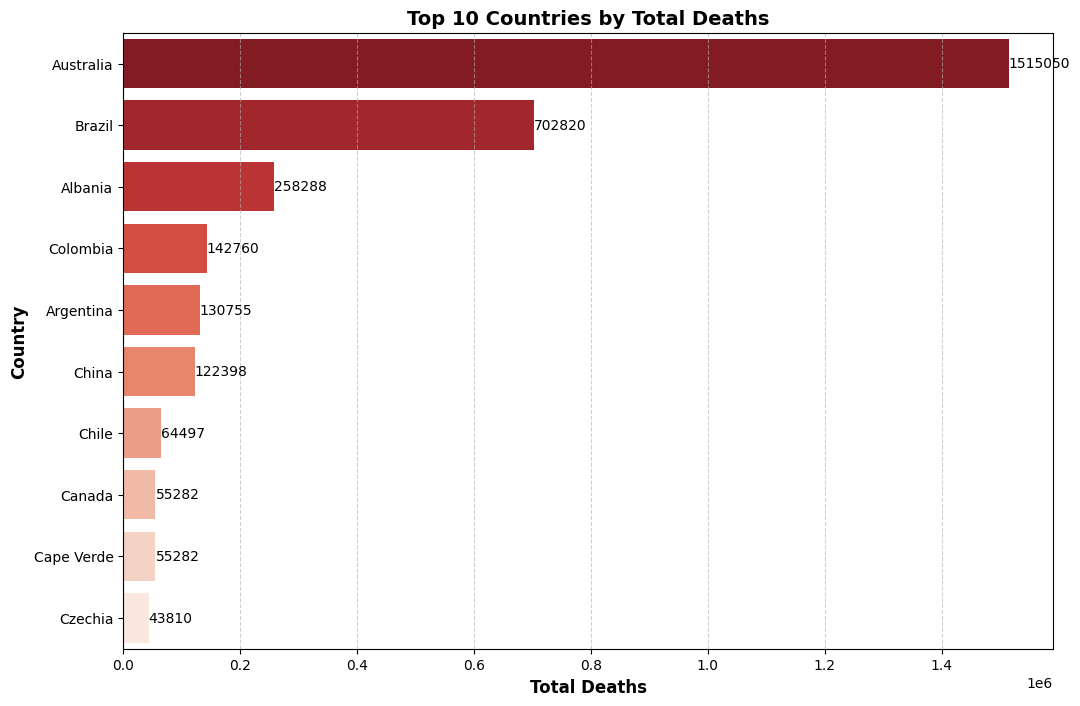

In [56]:
# Select the top 10 countries by total deaths
top_10_deaths = country_summary_sorted_deaths.head(10)

plt.figure(figsize=(12, 8))
ax_deaths = sns.barplot(x='max_total_deaths', y='country', data=top_10_deaths, hue='country', palette='Reds_r')

for container in ax_deaths.containers:
    ax_deaths.bar_label(container, fmt='%.0f')

plt.xlabel('Total Deaths', fontsize=12,fontweight='bold')
plt.ylabel('Country', fontsize=12,fontweight='bold')
plt.title('Top 10 Countries by Total Deaths', fontsize=14,fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

###Correlation between Total Cases vs Total Deaths

In [28]:
# Calculate the correlation between total_cases and total_deaths
correlation_cases_deaths = filtered_df['total_cases'].corr(filtered_df['total_deaths'])

print(f"Correlation between Total Cases and Total Deaths: {correlation_cases_deaths:.2f}")

Correlation between Total Cases and Total Deaths: 0.52


## Top 10 Countries with the Lowest Maximum Total Deaths

### Subtask:
Identify and display the top 10 countries with the lowest maximum total deaths recorded.

In [29]:
# Sort the country_summary by 'max_total_deaths' in ascending order and select the top 10
country_summary_sorted_deaths_lowest = country_summary.sort_values(by='max_total_deaths', ascending=True)

print("Top 10 Countries with the Lowest Maximum Total Deaths:")
display(country_summary_sorted_deaths_lowest.head(10))

Top 10 Countries with the Lowest Maximum Total Deaths:


,country,max_total_cases,max_total_deaths,max_total_deaths_per_million
46,Cook Islands,7375.0,2.0,135.99892
6,Anguilla,3904.0,12.0,847.21830
3,American Samoa,8359.0,34.0,703.61330
38,Cayman Islands,31472.0,37.0,517.06310
25,Bonaire Sint Eustatius and Saba,11922.0,41.0,1433.36600
29,British Virgin Islands,7644.0,64.0,1671.10560
39,Central African Republic,31472.0,113.0,517.06310
7,Antigua and Barbuda,9106.0,146.0,1573.20800
4,Andorra,48015.0,159.0,1995.60720
44,Comoros,9109.0,161.0,193.01431


## Visualize Top 10 Countries by Lowest Maximum Total Deaths

/tmp/ipython-input-54-2604952902.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='max_total_deaths', y='country', data=top_10_deaths_lowest, palette='viridis') # Changed palette to viridis and removed hue


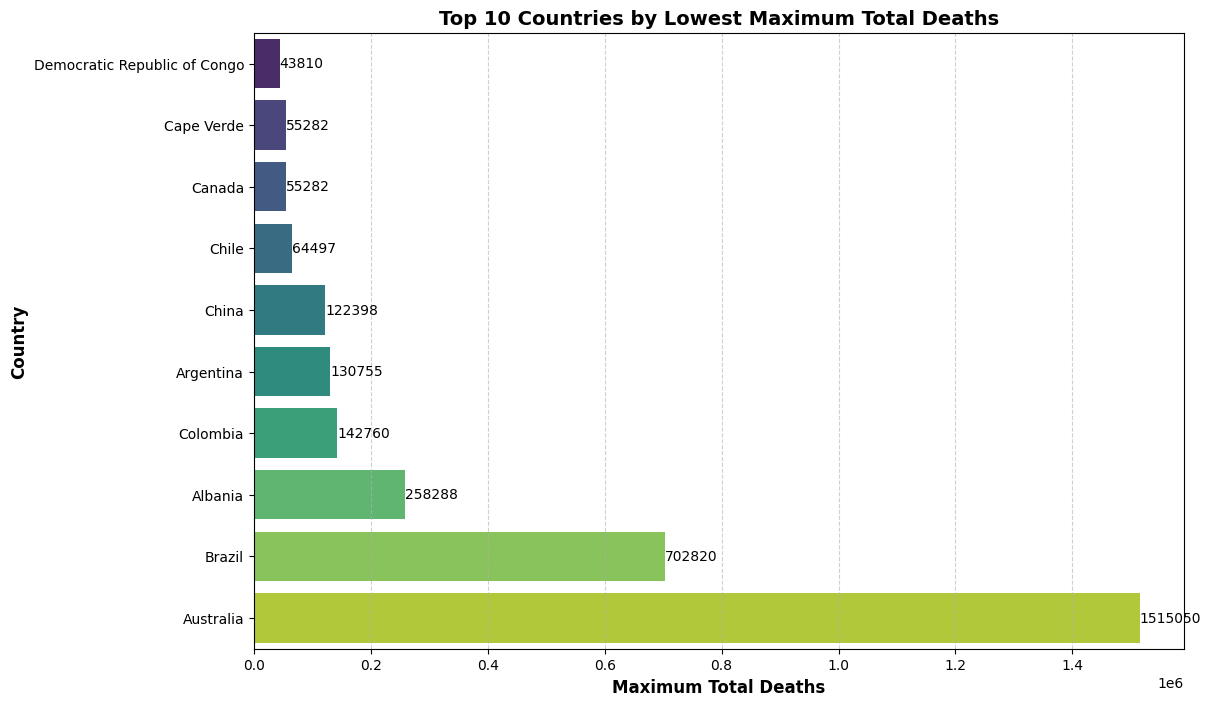

In [54]:
# Select the top 10 countries with the lowest maximum total deaths using nlargest with ascending=False
top_10_deaths_lowest = country_summary_sorted_deaths_lowest.nlargest(10, 'max_total_deaths', keep='first').sort_values(by='max_total_deaths', ascending=True)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='max_total_deaths', y='country', data=top_10_deaths_lowest, palette='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.xlabel('Maximum Total Deaths', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries by Lowest Maximum Total Deaths', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Visualize Top Countries by Total Deaths Per Million

In [31]:
# Sort country_summary by 'max_total_deaths_per_million' in descending order
country_summary_sorted_deaths_per_million = country_summary.sort_values(by='max_total_deaths_per_million', ascending=True)
print(country_summary_sorted_deaths_per_million.head(10))

                     country  max_total_cases  max_total_deaths  \
33                   Burundi          54569.0             400.0   
40                      Chad          15472.0             194.0   
46              Cook Islands           7375.0               2.0   
34                  Cambodia         139326.0            3056.0   
35                  Cameroon         139326.0            3056.0   
45                     Congo          25234.0             389.0   
44                   Comoros           9109.0             161.0   
0                Afghanistan         235214.0            7998.0   
39  Central African Republic          31472.0             113.0   
38            Cayman Islands          31472.0              37.0   

    max_total_deaths_per_million  
33                     17.770674  
40                     22.165611  
46                    135.998920  
34                    177.657260  
35                    177.657260  
45                    191.815480  
44               

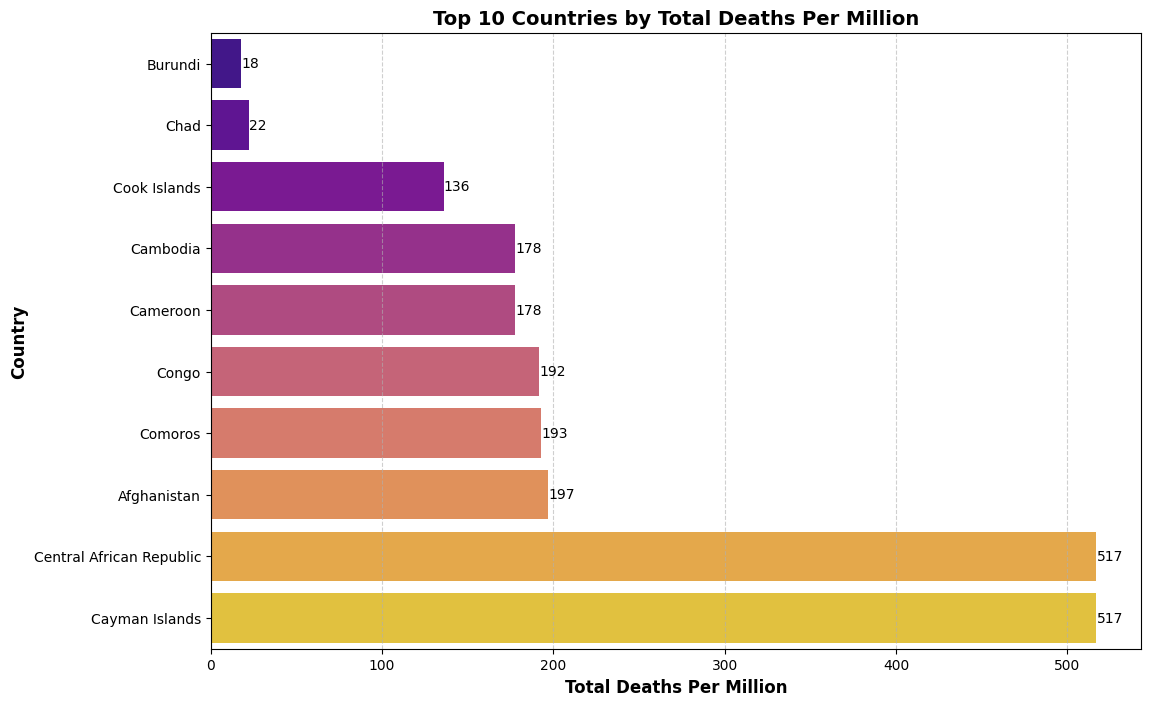

In [32]:
# Select the top 10 countries by total deaths per million
top_10_deaths_per_million = country_summary_sorted_deaths_per_million.head(10)

plt.figure(figsize=(12, 8))
ax_deaths_per_million = sns.barplot(x='max_total_deaths_per_million', y='country', data=top_10_deaths_per_million, hue='country', palette='plasma', legend=False)

for container in ax_deaths_per_million.containers:
    ax_deaths_per_million.bar_label(container, fmt='%.0f')

plt.xlabel('Total Deaths Per Million',fontsize=12,fontweight='bold')
plt.ylabel('Country',fontsize=12,fontweight='bold')
plt.title('Top 10 Countries by Total Deaths Per Million',fontsize=14,fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## Continent with Highest Total Deaths

### Subtask:
Identify and visualize the continent with the highest total deaths.

Continent with the highest total deaths:


,4
continent,Oceania
total_deaths,1515050.0


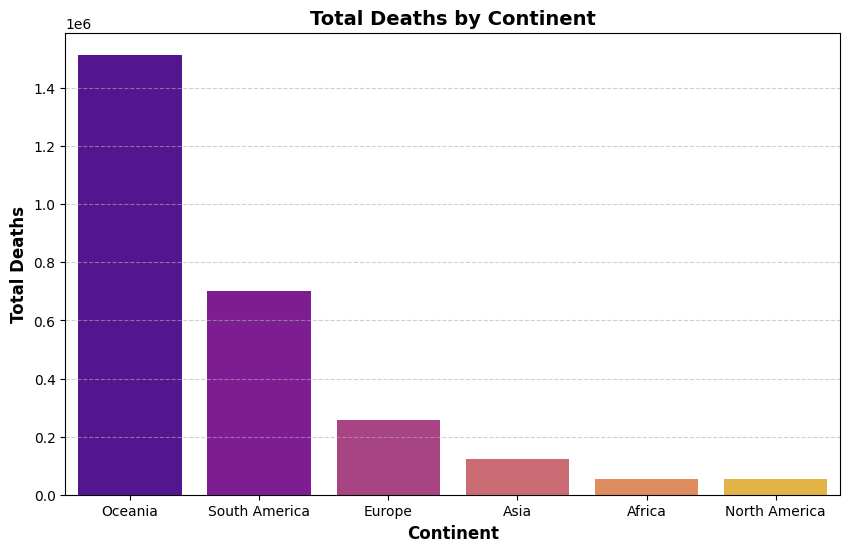

In [33]:
# Aggregate data by continent and find the maximum total deaths for each continent
continent_total_deaths = filtered_df.groupby('continent')['total_deaths'].max().reset_index()

# Find the continent with the highest total deaths
continent_highest_deaths = continent_total_deaths.loc[continent_total_deaths['total_deaths'].idxmax()]

print("Continent with the highest total deaths:")
display(continent_highest_deaths)

# Visualize total deaths by continent
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='total_deaths', data=continent_total_deaths.sort_values(by='total_deaths', ascending=False), hue='continent', palette='plasma', legend=False)
plt.title('Total Deaths by Continent', fontsize=14, fontweight='bold')
plt.xlabel('Continent', fontsize=12, fontweight='bold')
plt.ylabel('Total Deaths', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Task
Analyze and visualize the differences in the progression of total cases and total deaths between Asia and North America

In [34]:
# Filter the data for Asia and North America
asia_north_america_data = filtered_df[filtered_df['continent'].isin(['Asia', 'North America'])].copy()

# Aggregate data by date for each continent and calculate the sum of total cases and total deaths
continent_aggregated_data = asia_north_america_data.groupby(['date', 'continent'])[['total_cases', 'total_deaths']].sum().reset_index()
display(continent_aggregated_data.head())

,date,continent,total_cases,total_deaths
0,2020-01-01,Asia,12310087.0,88035.0
1,2020-01-01,North America,9787895.0,104162.0
2,2020-01-02,Asia,12310087.0,88035.0
3,2020-01-02,North America,9787895.0,104162.0
4,2020-01-03,Asia,12310087.0,88035.0


## Visualize the progression over time

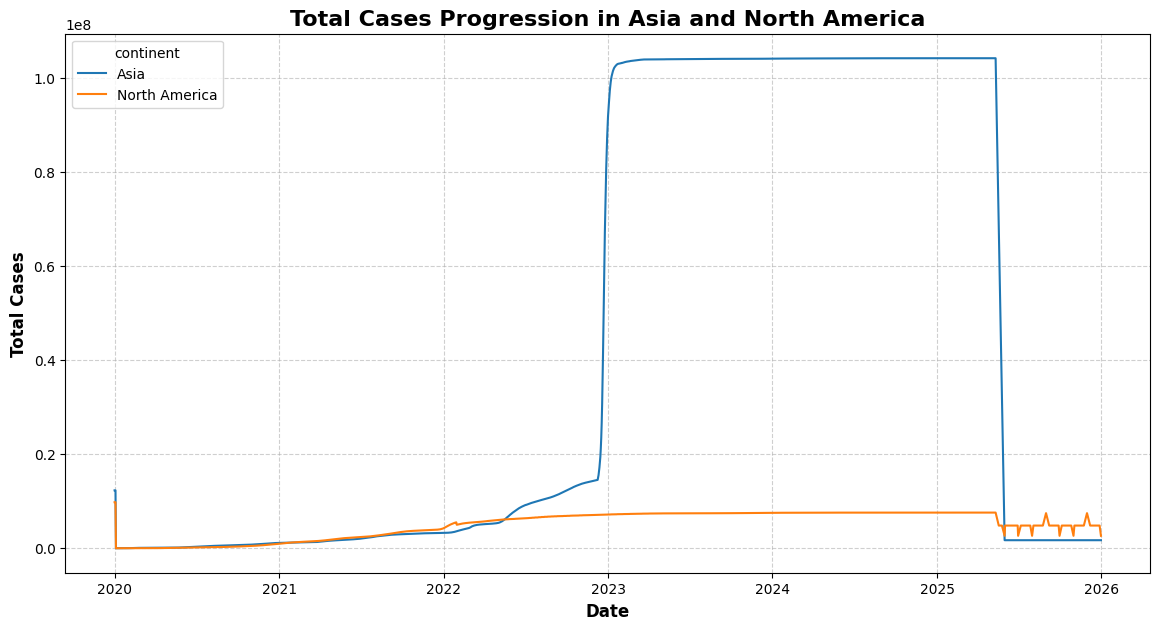

In [35]:
#Total Cases Progression in Asia and North America
plt.figure(figsize=(14, 7))
sns.lineplot(data=continent_aggregated_data, x='date', y='total_cases', hue='continent')
plt.title('Total Cases Progression in Asia and North America', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Cases', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

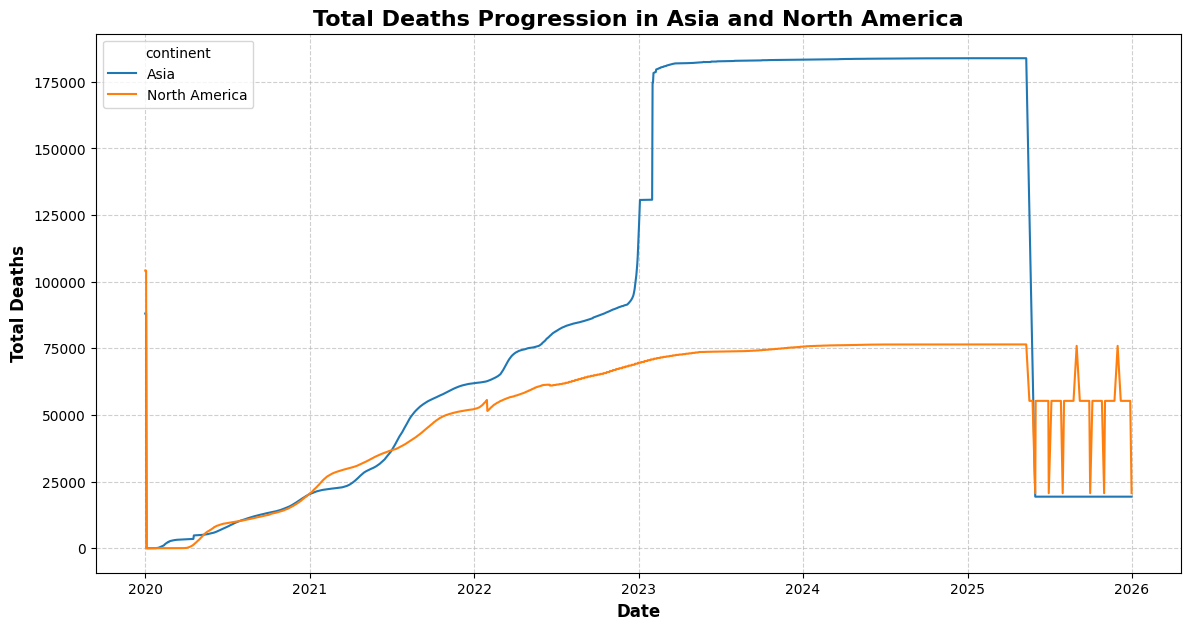

In [36]:
#'Total Deaths Progression in Asia and North America
plt.figure(figsize=(14, 7))
sns.lineplot(data=continent_aggregated_data, x='date', y='total_deaths', hue='continent')
plt.title('Total Deaths Progression in Asia and North America', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Total Deaths', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Identify Outliers in Fatality Rates

### Subtask:
Calculate the fatality rate for each country and identify countries with unexpectedly high or low fatality rates.

In [37]:
# Calculate fatality rate for each country
country_summary['fatality_rate'] = (country_summary['max_total_deaths'] / country_summary['max_total_cases']) * 100

# Sort by fatality rate to identify highest and lowest
country_summary_sorted_fatality = country_summary.sort_values(by='fatality_rate', ascending=False)

print("Countries with the highest fatality rates:")
display(country_summary_sorted_fatality.head(10))

print("\nCountries with the lowest fatality rates:")
display(country_summary_sorted_fatality.tail(10))

Countries with the highest fatality rates:


,country,max_total_cases,max_total_deaths,max_total_deaths_per_million,fatality_rate
26,Bosnia and Herzegovina,404278.0,16406.0,5119.24400,4.058099
27,Botswana,404278.0,16406.0,5119.24400,4.058099
0,Afghanistan,235214.0,7998.0,197.09799,3.400308
31,Bulgaria,1338423.0,38765.0,5679.17400,2.896319
32,Burkina Faso,1338423.0,38765.0,5679.17400,2.896319
34,Cambodia,139326.0,3056.0,177.65726,2.193417
35,Cameroon,139326.0,3056.0,177.65726,2.193417
2,Algeria,337196.0,6881.0,1276.01090,2.040653
1,Albania,13062418.0,258288.0,1276.01090,1.977337
10,Aruba,454267.0,8785.0,3049.46950,1.933885



Countries with the lowest fatality rates:


,country,max_total_cases,max_total_deaths,max_total_deaths_per_million,fatality_rate
56,Djibouti,3447490.0,10012.0,1696.13100,0.290414
23,Bhutan,62697.0,165.0,2548.89230,0.263170
15,Bahrain,696614.0,1536.0,2135.89200,0.220495
12,Austria,11861161.0,25236.0,2485.92530,0.212762
52,Cyprus,712934.0,1364.0,1645.93500,0.191322
43,Colombia,99381761.0,142760.0,2759.29300,0.143648
42,China,99381761.0,122398.0,3215.46830,0.123159
38,Cayman Islands,31472.0,37.0,517.06310,0.117565
30,Brunei,350550.0,182.0,1671.10560,0.051918
46,Cook Islands,7375.0,2.0,135.99892,0.027119


## Visualize Fatality Rate Distribution

### Subtask:
Visualize the distribution of fatality rates to better identify outliers.

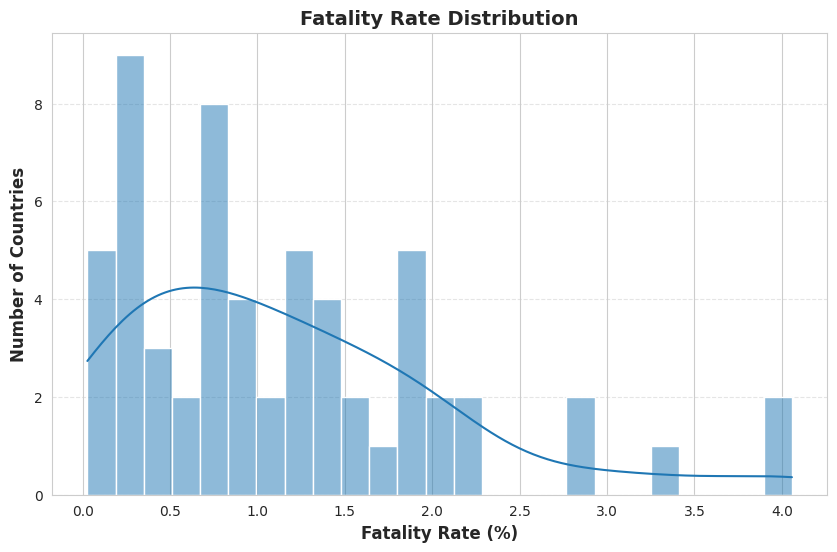

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(country_summary['fatality_rate'], bins=25, kde=True, palette='viridis')
plt.title('Fatality Rate Distribution', fontsize=14,fontweight='bold')
plt.xlabel('Fatality Rate (%)', fontsize=12,fontweight='bold')
plt.ylabel('Number of Countries', fontsize=12,fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

## Estimated Recovery Rate

### Subtask:
Calculate and visualize an estimated recovery rate using available data.

In [39]:
# Calculate estimated recovery rate
filtered_df['estimated_recovery_rate'] = ((filtered_df['total_cases'] - filtered_df['total_deaths']) / filtered_df['total_cases']) * 100

# Display recovery rates for a few countries
print(filtered_df.groupby('country')['estimated_recovery_rate'].mean().head(10))

country
Afghanistan            96.286817
Albania                98.472693
Algeria                97.037555
American Samoa         99.649157
Andorra                99.016940
Angola                 97.869336
Anguilla               99.787047
Antigua and Barbuda    97.587658
Argentina              97.948200
Armenia                98.101386
Name: estimated_recovery_rate, dtype: float64


/tmp/ipython-input-39-1270307775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['estimated_recovery_rate'] = ((filtered_df['total_cases'] - filtered_df['total_deaths']) / filtered_df['total_cases']) * 100


## Countries with Fastest Estimated Recovery Times

### Subtask:
Identify and display countries with the highest estimated recovery rates as a proxy for fastest recovery times.

In [40]:
# Compute the average estimated recovery rate per country
fastest_recovery_countries = filtered_df.groupby('country')['estimated_recovery_rate'].mean().reset_index().sort_values(by='estimated_recovery_rate', ascending=False)

# Display top 10 fastest recovery countries
print("Countries with the fastest estimated recovery times:")
print(fastest_recovery_countries.head(10))


Countries with the fastest estimated recovery times:
                            country  estimated_recovery_rate
46                     Cook Islands                99.976727
23                           Bhutan                99.956323
6                          Anguilla                99.787047
33                          Burundi                99.736587
15                          Bahrain                99.706933
57                         Dominica                99.651671
3                    American Samoa                99.649157
52                           Cyprus                99.562770
30                           Brunei                99.506353
25  Bonaire Sint Eustatius and Saba                99.486676


## Visualize Countries with Fastest Estimated Recovery Times

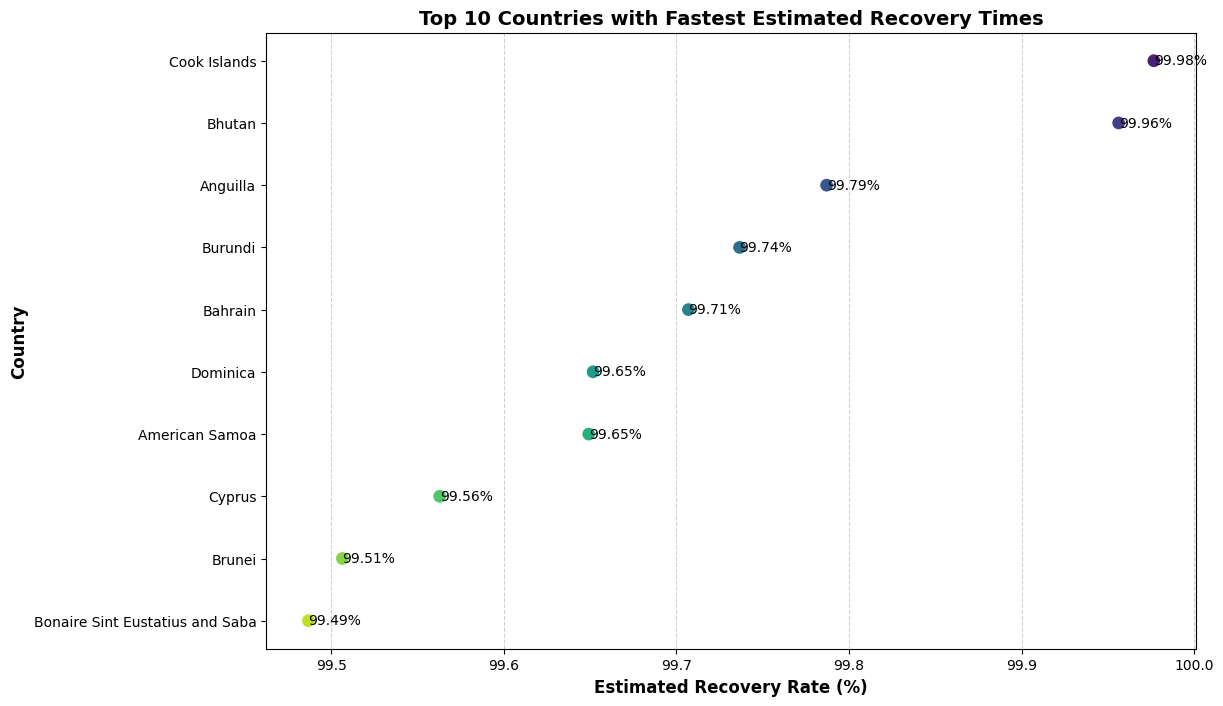

In [41]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='estimated_recovery_rate', y='country', data=fastest_recovery_countries.head(10), s=100, hue='country', palette='viridis', legend=False)

# show recovery rate
for i, country in fastest_recovery_countries.head(10).iterrows():
    ax.text(country['estimated_recovery_rate'], country['country'], f'{country["estimated_recovery_rate"]:.2f}%', va='center', ha='left', fontsize=10)


plt.xlabel('Estimated Recovery Rate (%)', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries with Fastest Estimated Recovery Times', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## Countries with Higher Positivity Rates

### Subtask:
Identify and display countries with higher positivity rates.

In [42]:
# Sort the data by 'positive_rate' in descending order
countries_by_positivity_rate = filtered_df.sort_values(by='positive_rate', ascending=False)

print("Countries with the highest positivity rates:")
display(countries_by_positivity_rate[['country', 'date', 'positive_rate']].head(10))

Countries with the highest positivity rates:


,country,date,positive_rate
106096,Curacao,2022-02-22,94.50549
106095,Curacao,2022-02-21,94.50549
106094,Curacao,2022-02-20,94.50549
106093,Curacao,2022-02-19,94.50549
106092,Curacao,2022-02-18,94.50549
106091,Curacao,2022-02-17,94.50549
106065,Curacao,2022-01-22,94.50549
106064,Curacao,2022-01-21,94.50549
106063,Curacao,2022-01-20,94.50549
106062,Curacao,2022-01-19,94.50549


## Top 10 Countries by Maximum ICU Patients

### Subtask:
Identify and display the top 10 countries with the highest maximum number of ICU patients.

In [44]:
# Find the maximum ICU patients for each country
max_icu_per_country = data_set.groupby('country')['icu_patients'].max().reset_index()

# Sort by maximum ICU patients in descending order and select the top 10
top_10_icu_countries = max_icu_per_country.sort_values(by='icu_patients', ascending=False).head(10)

print("Top 10 Countries by Maximum ICU Patients:")
display(top_10_icu_countries)

Top 10 Countries by Maximum ICU Patients:


,country,icu_patients
9,Argentina,7969.0
44,Chile,3406.0
56,Czechia,1896.0
22,Belgium,1474.0
39,Canada,1313.0
34,Bulgaria,799.0
15,Austria,709.0
14,Australia,424.0
10,Armenia,372.0
12,Asia,372.0


## Visualize Top 10 Countries by Maximum ICU Patients

### Subtask:
Visualize the top 10 countries with the highest maximum number of ICU patients using a bar plot.

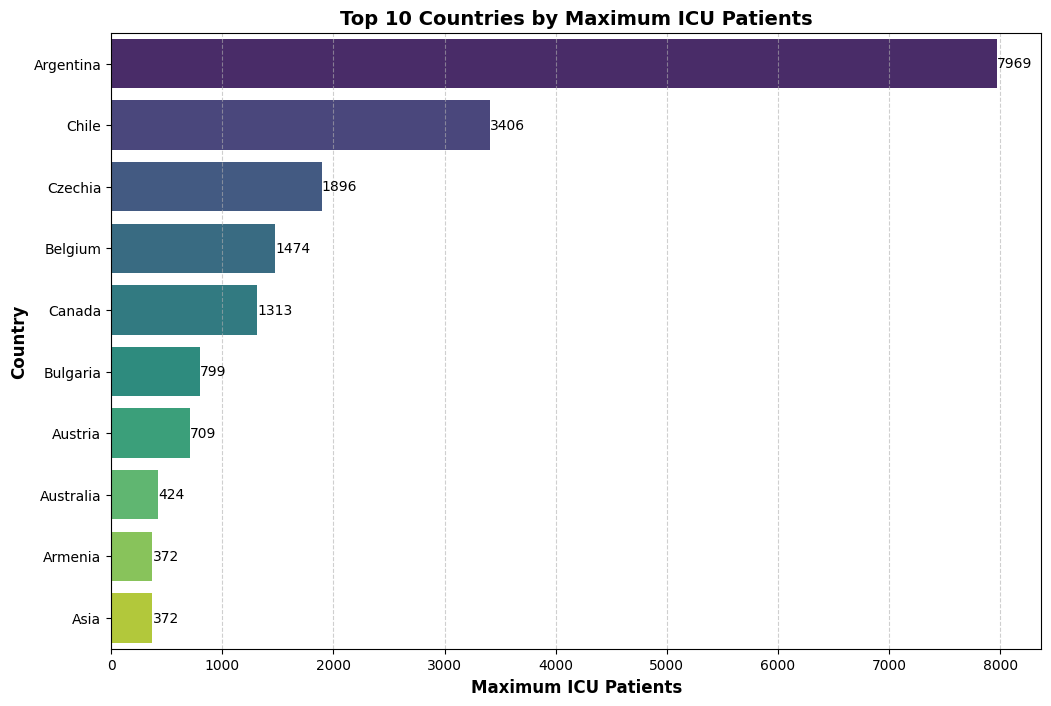

In [45]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='icu_patients', y='country', data=top_10_icu_countries, hue='country', palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.xlabel('Maximum ICU Patients', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries by Maximum ICU Patients', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## Top 10 Countries by Maximum ICU Patients Per Million

### Subtask:
Identify and display the top 10 countries with the highest maximum number of ICU patients per million.

In [46]:
# Compute max ICU patients per million for each country
top_10_icu_per_million_countries = data_set.groupby('country')['icu_patients_per_million'].max().reset_index().sort_values(by='icu_patients_per_million', ascending=False).head(10)

# Display results
print("Top 10 Countries by Maximum ICU Patients Per Million:")
print(top_10_icu_per_million_countries)


Top 10 Countries by Maximum ICU Patients Per Million:
      country  icu_patients_per_million
56    Czechia                   180.675
9   Argentina                   175.103
44      Chile                   173.742
22    Belgium                   126.459
34   Bulgaria                   117.813
15    Austria                    79.310
55     Cyprus                    63.616
39     Canada                    34.144
58    Denmark                    26.010
27    Bolivia                    19.224


## Visualize Top 10 Countries by Maximum ICU Patients Per Million


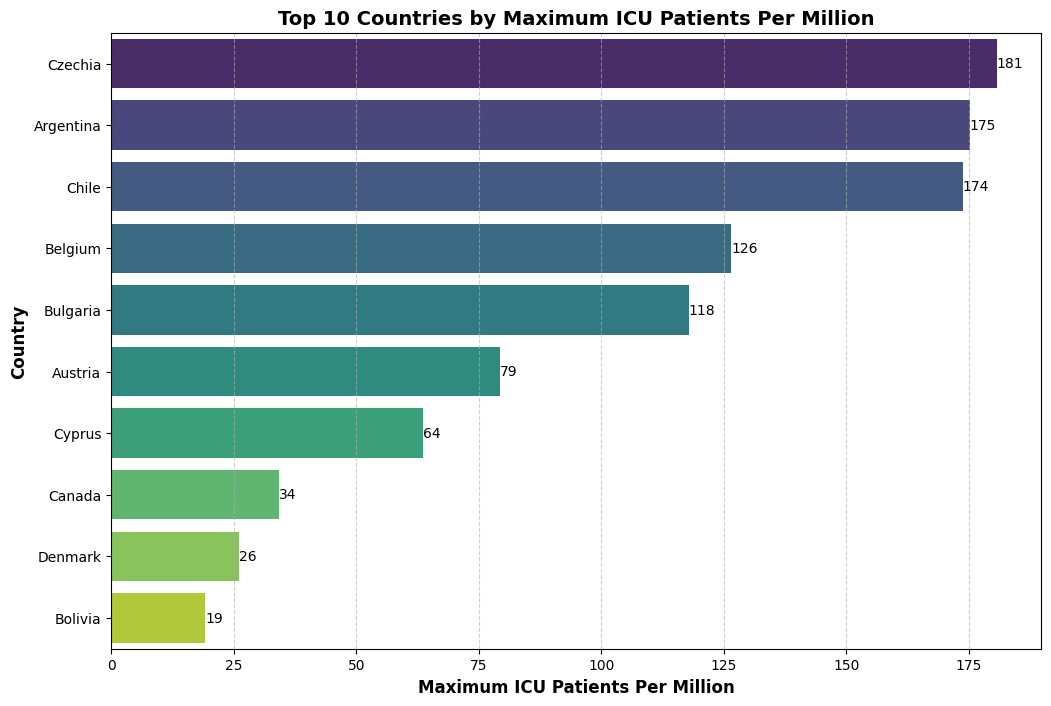

In [47]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='icu_patients_per_million', y='country', data=top_10_icu_per_million_countries, hue='country', palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.xlabel('Maximum ICU Patients Per Million', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries by Maximum ICU Patients Per Million', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## Top 10 Countries with Highest Stringency Index

### Subtask:
Identify and display the top 10 countries with the hightest stringency index.

In [48]:
# Find the maximum stringency index for each country
max_stringency_per_country = data_set.groupby('country')['stringency_index'].max().reset_index()

# Sort by maximum stringency index in descending order and select the top 10
top_10_highest_stringency_countries = max_stringency_per_country.sort_values(by='stringency_index', ascending=False).head(10)

print("Top 10 Countries with Highest Stringency Index:")
display(top_10_highest_stringency_countries)

Top 10 Countries with Highest Stringency Index:


,country,stringency_index
9,Argentina,100.00
61,Dominican Republic,100.00
53,Cuba,100.00
48,Congo,97.22
26,Bhutan,97.22
16,Azerbaijan,96.30
52,Croatia,96.30
25,Bermuda,96.30
17,Bahamas,96.30
27,Bolivia,96.30


## Visualize Top 10 Countries with Highest Stringency Index


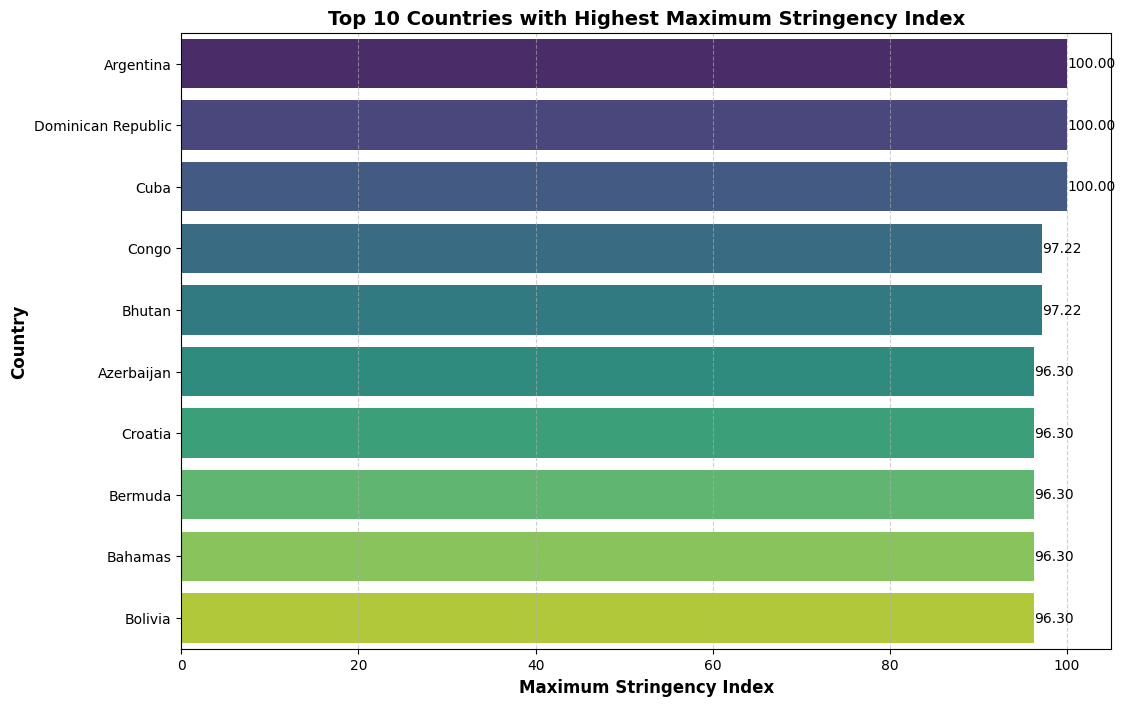

In [49]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='stringency_index', y='country', data=top_10_highest_stringency_countries, hue='country', palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.xlabel('Maximum Stringency Index', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries with Highest Maximum Stringency Index', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## Top 10 Countries by Total Tests

### Subtask:
Identify and visualize the top 10 countries with the highest number of total tests.

In [50]:
# Find the maximum total tests for each country
max_tests_per_country = data_set.groupby('country')['total_tests'].max().reset_index()

# Sort by maximum total tests in descending order and select the top 10
top_10_test_countries = max_tests_per_country.sort_values(by='total_tests', ascending=False).head(10)

print("Top 10 Countries by Total Tests:")
display(top_10_test_countries)

Top 10 Countries by Total Tests:


,country,total_tests
46,Colombia,9.214000e+09
45,China,9.214000e+09
16,Azerbaijan,1.897917e+08
15,Austria,1.897917e+08
14,Australia,7.337030e+07
32,British Virgin Islands,7.092322e+07
31,Brazil,7.092322e+07
59,Djibouti,6.464991e+07
58,Denmark,6.464991e+07
40,Cape Verde,6.217763e+07


## Visualize Top 10 Countries by Total Tests

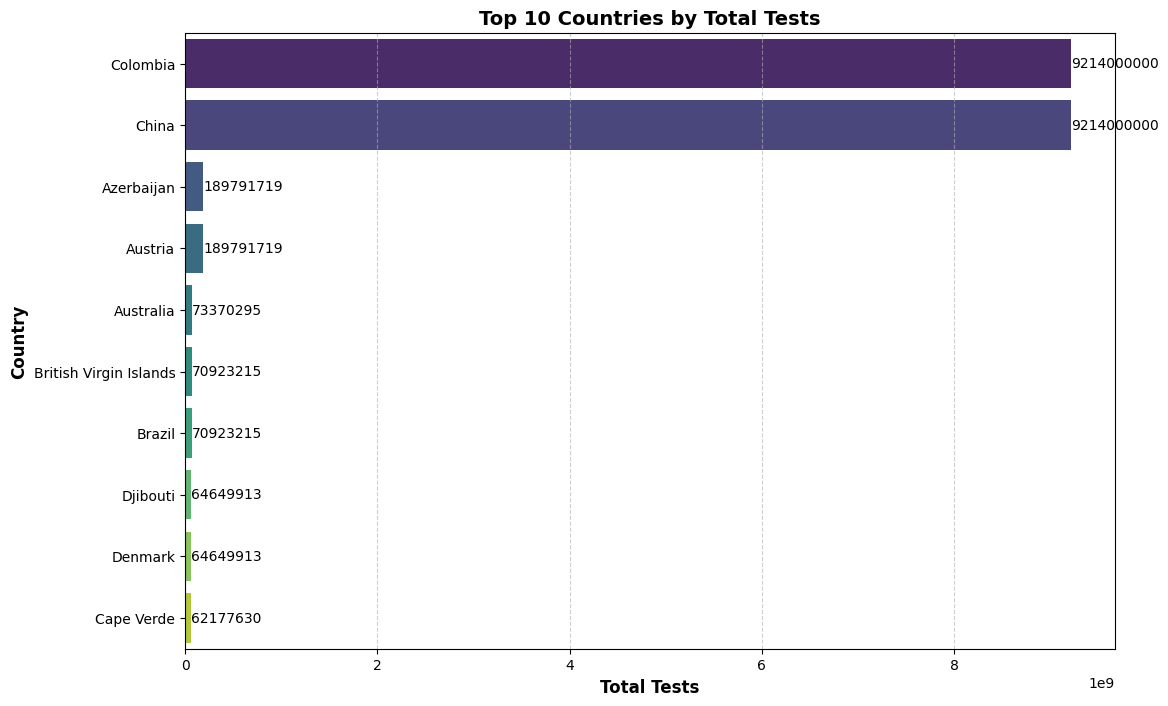

In [51]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='total_tests', y='country', data=top_10_test_countries, hue='country', palette='viridis', legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.xlabel('Total Tests', fontsize=12, fontweight='bold')
plt.ylabel('Country', fontsize=12, fontweight='bold')
plt.title('Top 10 Countries by Total Tests', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()